<a href="https://colab.research.google.com/github/chenyq121/760-2022S2/blob/main/(0_5062)orig_0_01_60ep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.densenet import DenseNet121
import os
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import load_model, Model
import time
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/760/Data/temphold/train.csv') # read in train set
disClass= {}
for i in range(len(train)):
  if (train['label_4bin'][i] == 'low'):
    disClass[int(train['NFT_Name'][i])] = 0 #{NFT_Name:label} {8252:0,8575:1}
  elif (train['label_4bin'][i] == 'high'):
    disClass[int(train['NFT_Name'][i])] = 1

val = pd.read_csv('/content/drive/Shareddrives/760/Data/temphold/validate.csv')
for i in range(len(val)):
  if (val['label_4bin'][i] == 'low'):
    disClass[int(val['NFT_Name'][i])] = 0
  elif (val['label_4bin'][i] == 'high'):
    disClass[int(val['NFT_Name'][i])] = 1

In [ ]:
norm_size = 120
EPOCHS = 60
INIT_LR = 0.01
labelList = [] 
classnum = 2
batch_size = 8

In [ ]:
def loadImageData():
    imageList = []
    '''
    original path： /content/drive/MyDrive/760Sue/ape
    grey path：/content/drive/MyDrive/760Sue/image_Bored_Ape_Grayscale
    blur path：/content/drive/MyDrive/760Sue/image_Bored_Ape_GaussianBlur
    '''
    listImage = os.listdir('/content/drive/MyDrive/760Sue/ape') 
    n = 0
    for img in listImage:
      print(n)
      n+=1
      ind = img.split('.')[0]
      ind = ind.split('(')[0] # 9876(1).png  
      ind = int(ind.split(' ')[0])
      if ind in disClass:
        labelList.append(disClass[ind])
        dataImgPath = os.path.join('/content/drive/MyDrive/760Sue/ape', img)
        print(dataImgPath) ##
        image = cv2.imdecode(np.fromfile(dataImgPath, dtype=np.uint8), -1)
        image = cv2.resize(image, (norm_size, norm_size), interpolation=cv2.INTER_LANCZOS4)
        image = img_to_array(image)
        imageList.append(image)

    imageList = np.array(imageList, dtype="int") / 255.0
    return imageList
    
imageArr = loadImageData()
labelList = np.array(labelList)
print(labelList)

流式输出内容被截断，只能显示最后 5000 行内容。
/content/drive/MyDrive/760Sue/ape/403.png
6348
/content/drive/MyDrive/760Sue/ape/4031.png
6349
/content/drive/MyDrive/760Sue/ape/4030.png
6350
6351
/content/drive/MyDrive/760Sue/ape/4032.png
6352
6353
/content/drive/MyDrive/760Sue/ape/4035.png
6354
6355
6356
/content/drive/MyDrive/760Sue/ape/4036.png
6357
6358
6359
6360
/content/drive/MyDrive/760Sue/ape/4039.png
6361
/content/drive/MyDrive/760Sue/ape/4042.png
6362
6363
6364
6365
/content/drive/MyDrive/760Sue/ape/4046.png
6366
/content/drive/MyDrive/760Sue/ape/4049.png
6367
6368
6369
6370
/content/drive/MyDrive/760Sue/ape/4052.png
6371
6372
/content/drive/MyDrive/760Sue/ape/4053.png
6373
/content/drive/MyDrive/760Sue/ape/4051.png
6374
6375
6376
6377
6378
/content/drive/MyDrive/760Sue/ape/406.png
6379
6380
/content/drive/MyDrive/760Sue/ape/4059.png
6381
/content/drive/MyDrive/760Sue/ape/4058.png
6382
6383
/content/drive/MyDrive/760Sue/ape/4065.png
6384
6385
6386
6387
/content/drive/MyDrive/760Sue/ape/4067.png
6

/usr/local/lib/python3.7/dist-packages/keras/applications/densenet.py:216: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  weights=weights)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1000)              8065640   
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 8,067,642
Trainable params: 7,983,994
Non-trainable params: 83,648
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


351/351 [============================>.] - ETA: 0s - loss: 0.6961 - accuracy: 0.5077
Epoch 00001: val_accuracy improved from -inf to 0.50284, saving model to weights_best_Deset_model.hdf5
351/351 [==============================] - 44s 64ms/step - loss: 0.6961 - accuracy: 0.5066 - val_loss: 0.6931 - val_accuracy: 0.5028 - lr: 0.0100
Epoch 2/60
352/351 [==============================] - ETA: 0s - loss: 0.6942 - accuracy: 0.4959
Epoch 00002: val_accuracy did not improve from 0.50284
351/351 [==============================] - 19s 53ms/step - loss: 0.6942 - accuracy: 0.4959 - val_loss: 0.6932 - val_accuracy: 0.4972 - lr: 0.0100
Epoch 3/60
351/351 [============================>.] - ETA: 0s - loss: 0.6945 - accuracy: 0.4991
Epoch 00003: val_accuracy did not improve from 0.50284
351/351 [==============================] - 19s 54ms/step - loss: 0.6944 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5028 - lr: 0.0100
Epoch 4/60
351/351 [============================>.] - ETA: 0s - loss: 0.

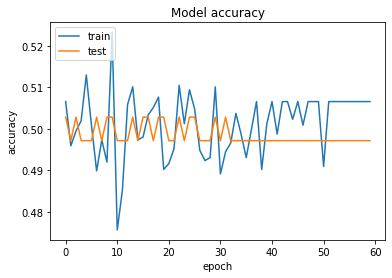

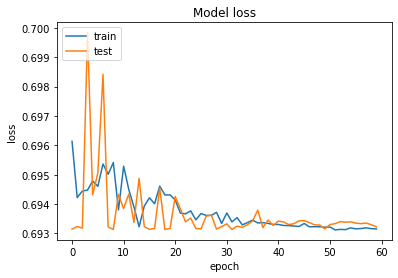

In [ ]:
model = Sequential()
model.add(DenseNet121(include_top=True, weights=None,input_shape=[norm_size, norm_size, 4]))# Kento Kento Kento: if orig, there is 4, if grey, there is 1, if blur, there is 3
model.add(Dense(classnum, activation='softmax'))
model.summary()
optimizer = Adam(lr=INIT_LR)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

trainX, valX, trainY, valY = train_test_split(imageArr, labelList, test_size=0.2, random_state=42)




train_datagen = ImageDataGenerator(featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator()  
train_generator = train_datagen.flow(trainX, trainY, batch_size=batch_size, shuffle=True)
val_generator = val_datagen.flow(valX, valY, batch_size=batch_size, shuffle=True)
checkpointer = ModelCheckpoint(filepath='weights_best_Deset_model.hdf5',
                               monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce = ReduceLROnPlateau(monitor='val_accuracy', patience=10,
                           verbose=1,
                           factor=0.5,
                           min_lr=1e-6)
history = model.fit_generator(train_generator,
                              steps_per_epoch=(trainX.shape[0] / batch_size),
                              validation_data=val_generator,
                              epochs=EPOCHS,
                              validation_steps=(valX.shape[0] / batch_size),
                              callbacks=[checkpointer, reduce],
                              verbose=1, shuffle=True)
model.save('my_model_Desnet.h10')
print(history)

loss_trend_graph_path = r"WW_loss.jpg"
acc_trend_graph_path = r"WW_acc.jpg"
import matplotlib.pyplot as plt

print("Now,we start drawing the loss and acc trends graph...")
fig = plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.savefig(acc_trend_graph_path)
fig = plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.savefig(loss_trend_graph_path)
print("We are done, everything seems OK...")

In [ ]:
val = pd.read_csv('/content/drive/Shareddrives/760/Data/temphold/test.csv')
disClass_val = {}
for i in range(len(val)):
  if (val['label_4bin'][i] == 'low'):
    disClass_val[int(val['NFT_Name'][i])] = 0
  elif (val['label_4bin'][i] == 'high'):
    disClass_val[int(val['NFT_Name'][i])] = 1

imagelist = []
labelList=[]

def loadImageData():
    imageList = []
    listImage = os.listdir('/content/drive/MyDrive/760Sue/ape')
    n = 0
    for img in listImage:
      ind = img.split('.')[0]
      ind = ind.split('(')[0]
      ind = int(ind.split(' ')[0])
      print(n)
      n+=1
      if ind in disClass_val:
        labelList.append(disClass_val[ind])
        dataImgPath = os.path.join('/content/drive/MyDrive/760Sue/ape', img)
        print(dataImgPath) ##
        image = cv2.imdecode(np.fromfile(dataImgPath, dtype=np.uint8), -1)
        image = cv2.resize(image, (norm_size, norm_size), interpolation=cv2.INTER_LANCZOS4)
        image = img_to_array(image)
        imageList.append(image)

    imageList = np.array(imageList, dtype="int") / 255.0


    return imageList


print("start")
imageArr = loadImageData()
labelList = np.array(labelList)
print(labelList)

emotion_classifier=load_model("my_model_Desnet.h10")
emotion_classifier.summary()
test_loss, test_acc = emotion_classifier.evaluate(imageArr,labelList)
print('test_acc=', test_acc)

流式输出内容被截断，只能显示最后 5000 行内容。
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
/content/drive/MyDrive/760Sue/ape/5040.png
5478
5479
5480
/content/drive/MyDrive/760Sue/ape/5043.png
5481
5482
5483
5484
5485
5486
5487
/content/drive/MyDrive/760Sue/ape/505.png
5488
5489
/content/drive/MyDrive/760Sue/ape/5051.png
5490
5491
5492
5493
5494
5495
5496
/content/drive/MyDrive/760Sue/ape/506.png
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
/content/drive/MyDrive/760Sue/ape/5075.png
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
/content/drive/MyDrive/760Sue/ape/5095.png
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
/content/drive/MyDrive/760Sue/ape/5102.png
5550
5551
5552
/content/drive/MyDrive/760Sue/ape/5108.png
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
556